In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import pulp


In [4]:

df = pd.read_csv("1970-2021_DISASTERS.xlsx - emdat data.csv")



In [5]:
df

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14639,2021-0449-YEM,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14640,2021-0075-ZAF,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,400.0,NaN,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
14641,2021-0599-COD,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,...,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14642,2021-0020-SRB,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [6]:
df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [7]:
print("Shape:", df.shape)
print("Columns:", df.columns)
df.info()
df.isnull().sum()


Shape: (14644, 47)
Columns: Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Cou

Dis No                                 0
Year                                   0
Seq                                    0
Glide                              13063
Disaster Group                         0
Disaster Subgroup                      0
Disaster Type                          0
Disaster Subtype                    2747
Disaster Subsubtype                13600
Event Name                         10999
Country                                0
ISO                                    0
Region                                 0
Continent                              0
Location                            1346
Origin                             10864
Associated Dis                     11412
Associated Dis2                    13946
OFDA Response                      13194
Appeal                             12204
Declaration                        11517
Aid Contribution                   13967
Dis Mag Value                      10075
Dis Mag Scale                       1073
Latitude        

In [12]:
print(df.columns)


Index(['Dis No', 'Year', 'Seq', 'Glide', 'Disaster Group', 'Disaster Subgroup',
       'Disaster Type', 'Disaster Subtype', 'Disaster Subsubtype',
       'Event Name', 'Country', 'ISO', 'Region', 'Continent', 'Location',
       'Origin', 'Associated Dis', 'Associated Dis2', 'OFDA Response',
       'Appeal', 'Declaration', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Local Time', 'River Basin',
       'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month',
       'End Day', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Adm Level', 'Admin1 Code', 'Admin2 Code', 'Geo Locations'],
      dtype='object')


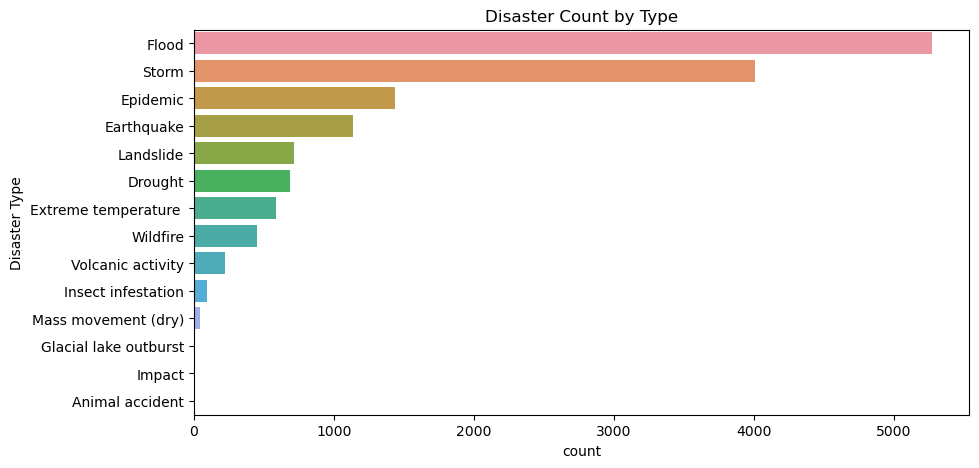

In [13]:
if "Disaster Type" in df.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(
        y="Disaster Type", 
        data=df, 
        order=df['Disaster Type'].value_counts().index
    )
    plt.title("Disaster Count by Type")
    plt.show()

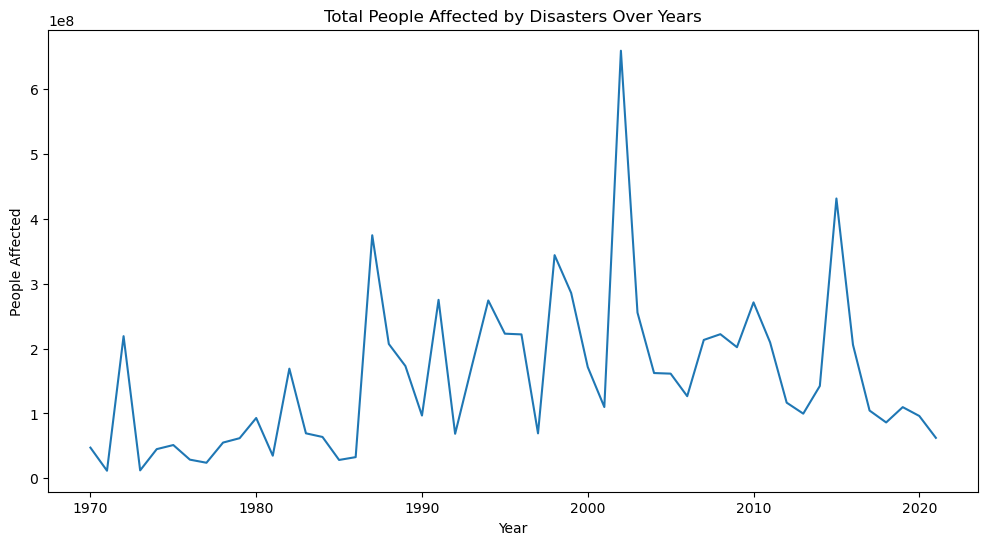

In [14]:
if "Year" in df.columns and "Total Affected" in df.columns:
    df.groupby("Year")["Total Affected"].sum().plot(figsize=(12,6))
    plt.title("Total People Affected by Disasters Over Years")
    plt.ylabel("People Affected")
    plt.show()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import chi2, SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier



In [4]:

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("1970-2021_DISASTERS.xlsx - emdat data.csv")

df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


Shape: (14644, 47)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14644 entries, 0 to 14643
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14644 non-null  object 
 1   Year                             14644 non-null  int64  
 2   Seq                              14644 non-null  int64  
 3   Glide                            1581 non-null   object 
 4   Disaster Group                   14644 non-null  object 
 5   Disaster Subgroup                14644 non-null  object 
 6   Disaster Type                    14644 non-null  object 
 7   Disaster Subtype                 11897 non-null  object 
 8   Disaster Subsubtype              1044 non-null   object 
 9   Event Name                       3645 non-null   object 
 10  Country                          14644 non-null  object 
 11  ISO                              14644 non-null  objec

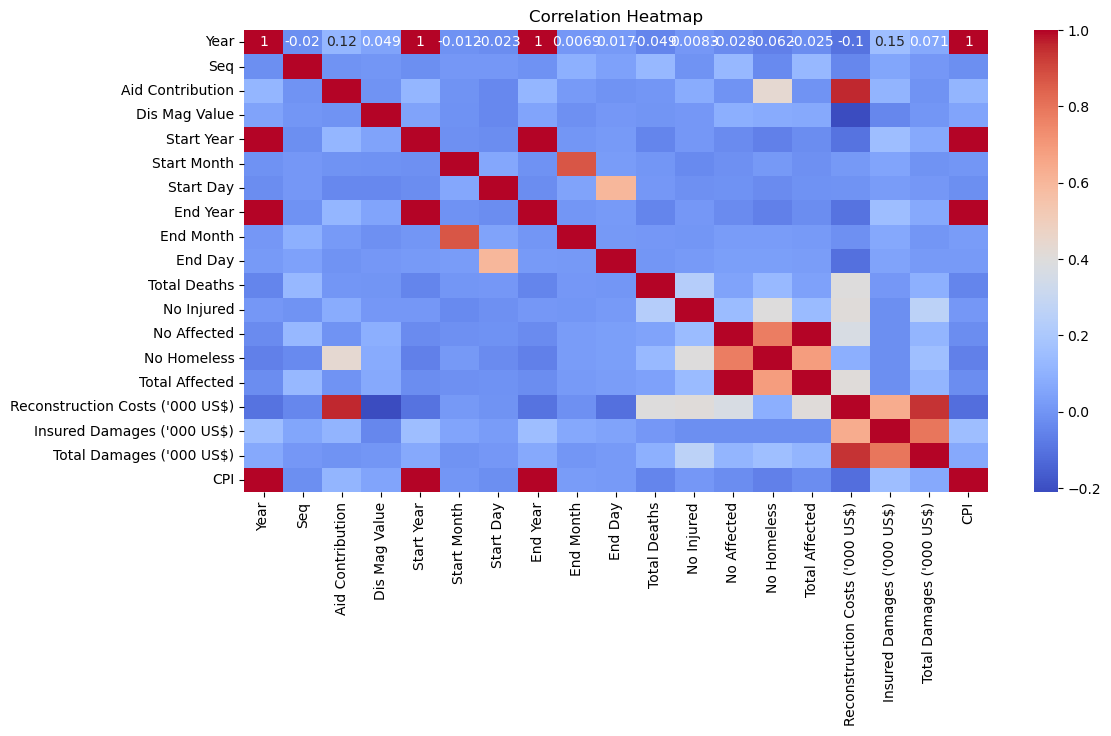

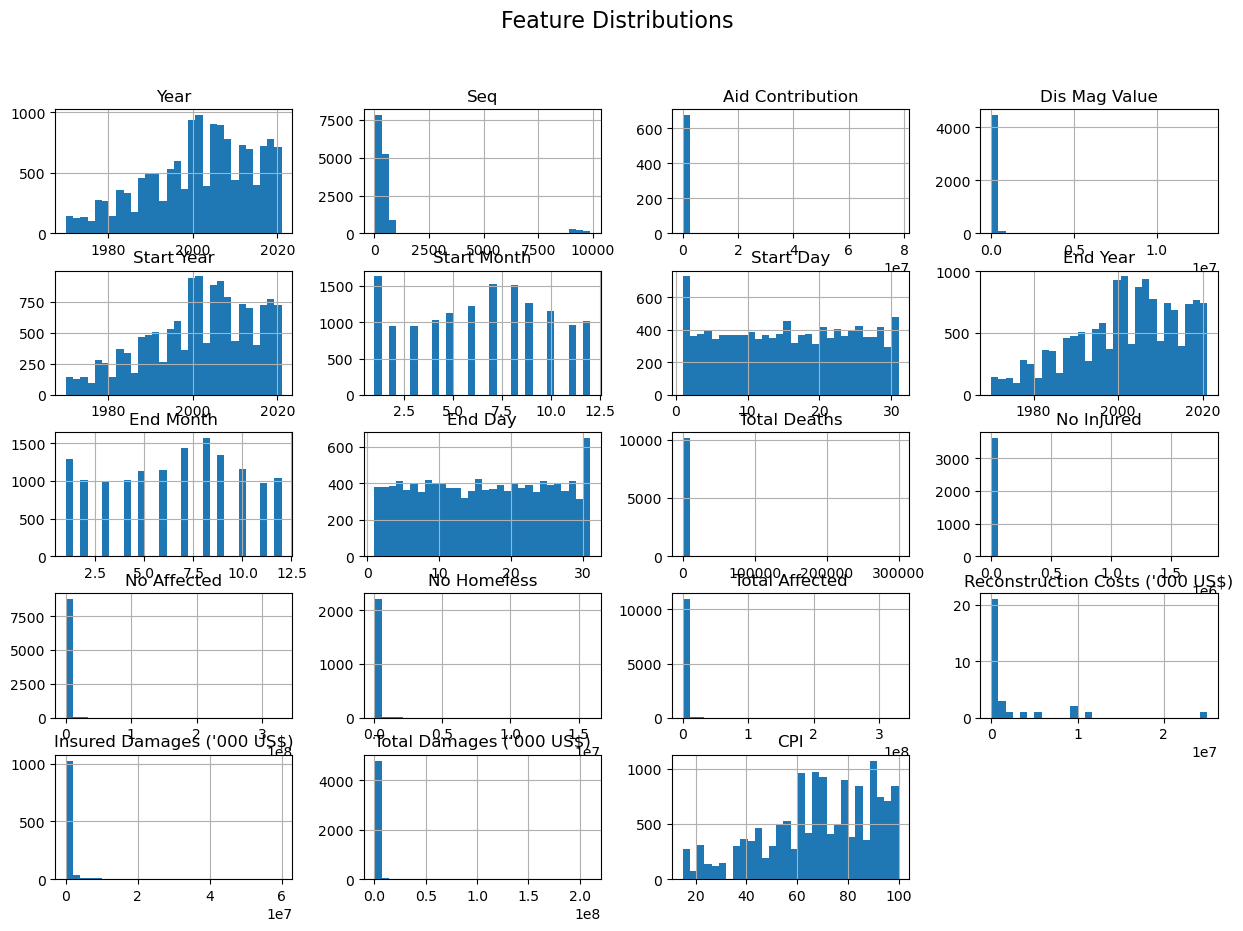

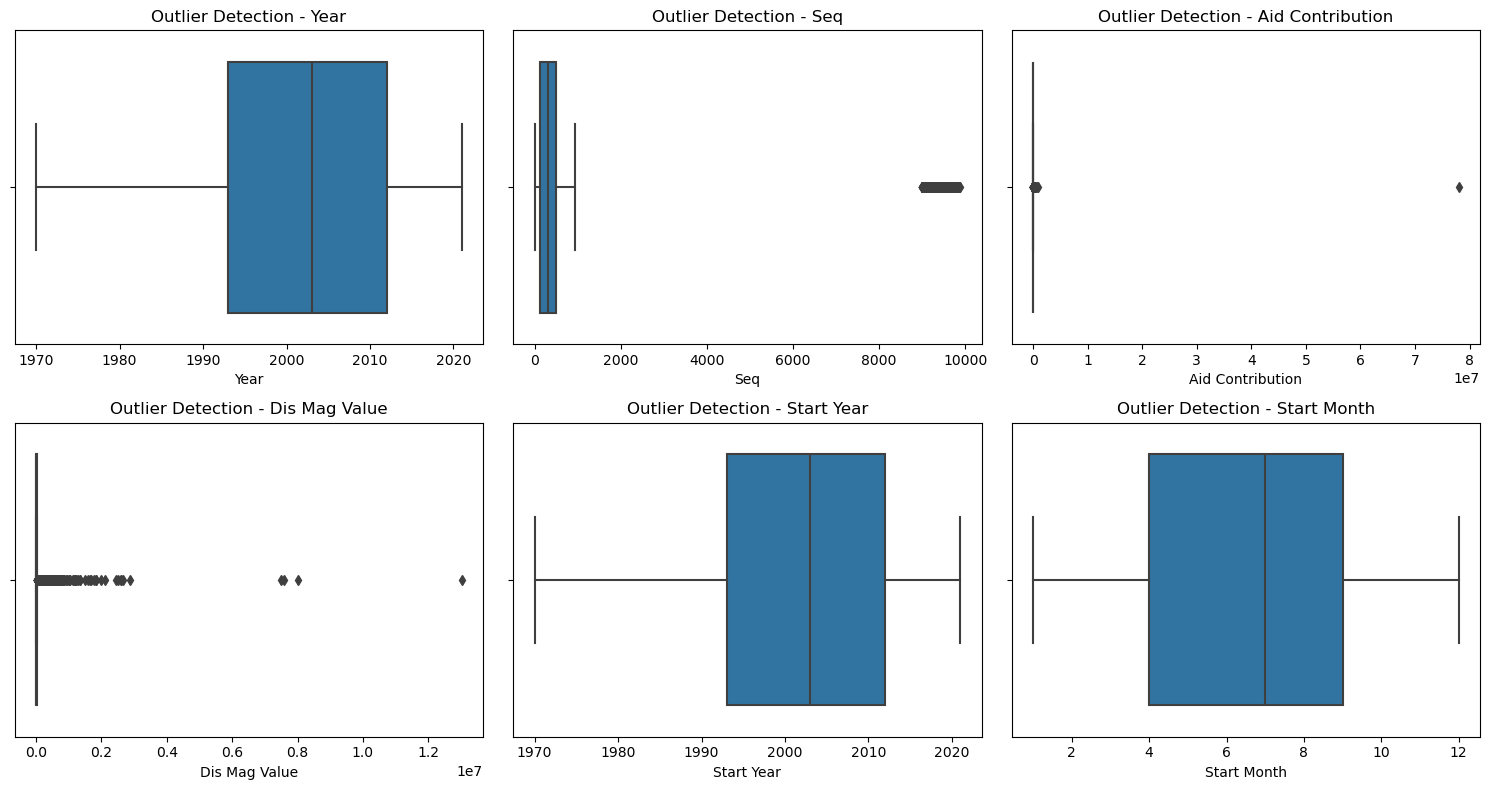

In [5]:
print("Shape:", df.shape)

print("\nInfo:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

# Correlation heatmap 
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution plots 
df.hist(figsize=(15, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Detect outliers using boxplots
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols[:6], 1):  # First 6 numeric cols
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection - {col}")
plt.tight_layout()
plt.show()

In [6]:
df = df.fillna(method="ffill")

In [7]:
cat_cols = df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col].astype(str))

scaler = StandardScaler()
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

print("Transformed Dataset:")
df.head()

Transformed Dataset:


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,-1.730277,-2.520024,-0.375848,0.6585,0.0,0.269290,-0.435922,1.595771,1.294007,1.996855,...,NaN,NaN,NaN,NaN,-0.147921,-2.511247,1.836037,0.963485,2.147422,1.878366
1,-1.715137,-2.520024,-0.325638,0.6585,0.0,0.890312,1.234606,1.226564,1.294007,-1.362182,...,NaN,NaN,NaN,NaN,-0.136726,-2.511247,1.836037,0.963485,2.147422,1.878366
2,-1.724126,-2.520024,-0.359634,0.6585,0.0,0.269290,-0.435922,1.226564,1.294007,-1.362182,...,NaN,NaN,NaN,NaN,-0.153769,-2.511247,1.836037,0.963485,2.147422,1.878366
3,-1.720105,-2.520024,-0.349697,0.6585,0.0,0.890312,1.234606,1.226564,1.294007,-1.362182,...,NaN,0.331965,NaN,NaN,-0.133442,-2.511247,1.836037,0.963485,2.147422,1.878366
4,-1.727911,-2.520024,-0.369049,0.6585,0.0,0.890312,1.234606,1.226564,1.294007,-1.362182,...,NaN,-0.088147,NaN,NaN,-0.133442,-2.511247,1.836037,0.963485,2.147422,1.878366


In [8]:
# NOTE: Update 'TargetColumn' with your actual target variable
X = df.drop("TargetColumn", axis=1, errors='ignore')
y = df["TargetColumn"] if "TargetColumn" in df.columns else None

if y is not None:
    # Correlation-based feature elimination
    corr_matrix = X.corr()
    high_corr = [(col, corr_matrix[col].nlargest(2).index[1]) for col in corr_matrix.columns if abs(corr_matrix[col]).max() > 0.85]
    print("Highly correlated features:", high_corr)

In [15]:
if "Disaster Subgroup" not in df.columns:
    raise ValueError("❌ Target column 'Disaster Subgroup' not found in dataset!")

y = df["Disaster Subgroup"]
X = df.drop(columns=["Disaster Subgroup"], errors="ignore")

In [16]:
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns

In [17]:
if len(num_cols) > 0:
    imputer_num = SimpleImputer(strategy="mean")
    X[num_cols] = imputer_num.fit_transform(X[num_cols])

# Categorical imputation
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

# Convert categorical features to numeric (Label Encoding)
X = pd.get_dummies(X, drop_first=True)

In [18]:
# 1. Chi-Square Test (categorical target)
try:
    chi2_selector = SelectKBest(score_func=chi2, k=5)
    X_chi2 = chi2_selector.fit_transform(abs(X), y)
    print("🔥 Top features (Chi2):", X.columns[chi2_selector.get_support()].tolist())
except Exception as e:
    print("⚠️ Chi2 test skipped:", e)

# 2. ANOVA F-test (numerical relevance)
try:
    f_selector = SelectKBest(score_func=f_classif, k=5)
    X_f = f_selector.fit_transform(X, y)
    print("🔥 Top features (ANOVA F-test):", X.columns[f_selector.get_support()].tolist())
except Exception as e:
    print("⚠️ ANOVA F-test skipped:", e)

# 3. Random Forest Importance
try:
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:5]
    print("🔥 Top features (RandomForest):")
    print(importances)
except Exception as e:
    print("⚠️ RandomForest skipped:", e)

⚠️ Chi2 test skipped: Unknown label type: (array([ 0.26929036,  0.89031209,  0.26929036, ..., -2.21479657,
        0.26929036,  0.26929036]),)
🔥 Top features (ANOVA F-test): ['Seq', 'Disaster Type', 'Disaster Subtype', 'Continent', 'Dis Mag Scale']
⚠️ RandomForest skipped: Unknown label type: 'continuous'


In [21]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier

# ==========================
# Load dataset
# ==========================
df = pd.read_csv("1970-2021_DISASTERS.xlsx - emdat data.csv")

# Use "Disaster Subgroup" as the target
if "Disaster Subgroup" not in df.columns:
    raise ValueError("❌ Target column 'Disaster Subgroup' not found in dataset!")

y = df["Disaster Subgroup"]
X = df.drop(columns=["Disaster Subgroup"], errors="ignore")

# ==========================
# Handle Missing Values
# ==========================
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Numerical imputation
if len(num_cols) > 0:
    imputer_num = SimpleImputer(strategy="mean")
    X[num_cols] = imputer_num.fit_transform(X[num_cols])

# Categorical imputation
if len(cat_cols) > 0:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    X[cat_cols] = imputer_cat.fit_transform(X[cat_cols])

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# ==========================
# Feature Selection Methods
# ==========================
feature_scores = {}

# 1. Chi-Square Test
try:
    chi2_selector = SelectKBest(score_func=chi2, k=min(10, X.shape[1]))
    chi2_selector.fit(abs(X), y)
    chi2_features = X.columns[chi2_selector.get_support()].tolist()
    for f in chi2_features:
        feature_scores[f] = feature_scores.get(f, 0) + 1
    print("🔥 Chi2 Features:", chi2_features)
except Exception as e:
    print("⚠️ Chi2 skipped:", e)

# 2. ANOVA F-test
try:
    f_selector = SelectKBest(score_func=f_classif, k=min(10, X.shape[1]))
    f_selector.fit(X, y)
    f_features = X.columns[f_selector.get_support()].tolist()
    for f in f_features:
        feature_scores[f] = feature_scores.get(f, 0) + 1
    print("🔥 ANOVA Features:", f_features)
except Exception as e:
    print("⚠️ ANOVA skipped:", e)

# 3. Random Forest Feature Importance
try:
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    importances = pd.Series(rf.feature_importances_, index=X.columns)
    top_rf_features = importances.sort_values(ascending=False).head(10).index.tolist()
    for f in top_rf_features:
        feature_scores[f] = feature_scores.get(f, 0) + 1
    print("🔥 RandomForest Features:", top_rf_features)
except Exception as e:
    print("⚠️ RandomForest skipped:", e)

# ==========================
# Final Ranking
# ==========================
final_ranking = pd.DataFrame.from_dict(feature_scores, orient="index", columns=["Score"])
final_ranking = final_ranking.sort_values(by="Score", ascending=False)

print("\n🏆 Final Ranked Features Across Methods:")
print(final_ranking)


🔥 Chi2 Features: ['Seq', 'Aid Contribution', 'Dis Mag Value', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', "Insured Damages ('000 US$)", "Total Damages ('000 US$)"]
🔥 ANOVA Features: ['Dis No_2013-0060-RUS', 'Disaster Type_Earthquake', 'Disaster Type_Epidemic', 'Disaster Type_Flood', 'Disaster Type_Impact', 'Disaster Type_Storm', 'Location_Chelyabinsk (Ural Region)', 'Dis Mag Scale_Kph', 'Dis Mag Scale_Richter', 'Dis Mag Scale_Vaccinated']
🔥 RandomForest Features: ['Disaster Type_Flood', 'Disaster Type_Storm', 'Dis Mag Scale_Kph', 'Disaster Type_Epidemic', 'Disaster Subtype_Riverine flood', 'Dis Mag Scale_Vaccinated', 'Disaster Subtype_Ground movement', 'Disaster Subtype_Tropical cyclone', 'Event Name_Cholera', 'Dis Mag Value']

🏆 Final Ranked Features Across Methods:
                                    Score
Disaster Type_Epidemic                  2
Disaster Type_Flood                     2
Dis Mag Value                           2
Dis Mag Scale_Vaccin


🏆 Final Ranked Features Across Methods:
                                    Score
Disaster Type_Epidemic                  2
Disaster Type_Flood                     2
Dis Mag Value                           2
Dis Mag Scale_Vaccinated                2
Dis Mag Scale_Kph                       2
Disaster Type_Storm                     2
Disaster Subtype_Tropical cyclone       1
Disaster Subtype_Ground movement        1
Disaster Subtype_Riverine flood         1
Dis Mag Scale_Richter                   1
Location_Chelyabinsk (Ural Region)      1
Disaster Type_Impact                    1
Seq                                     1
Aid Contribution                        1
Disaster Type_Earthquake                1
Dis No_2013-0060-RUS                    1
Total Damages ('000 US$)                1
Insured Damages ('000 US$)              1
Total Affected                          1
No Homeless                             1
No Affected                             1
No Injured                         

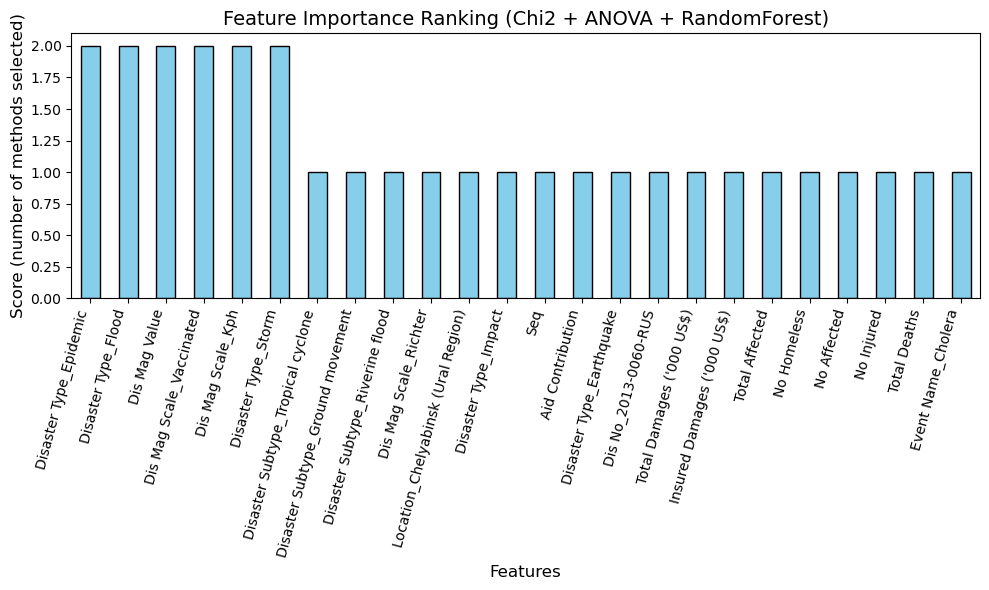

In [22]:
import matplotlib.pyplot as plt

# ==========================
# Final Ranking (already built)
# ==========================
final_ranking = pd.DataFrame.from_dict(feature_scores, orient="index", columns=["Score"])
final_ranking = final_ranking.sort_values(by="Score", ascending=False)

print("\n🏆 Final Ranked Features Across Methods:")
print(final_ranking)

# ==========================
# Visualization
# ==========================
plt.figure(figsize=(10, 6))
final_ranking["Score"].plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Feature Importance Ranking (Chi2 + ANOVA + RandomForest)", fontsize=14)
plt.ylabel("Score (number of methods selected)", fontsize=12)
plt.xlabel("Features", fontsize=12)
plt.xticks(rotation=75, ha="right")
plt.tight_layout()
plt.show()


In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
file_path = "1970-2021_DISASTERS.xlsx - emdat data.csv"   
df = pd.read_csv(file_path)

In [3]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (14644, 47)
          Dis No  Year  Seq Glide Disaster Group Disaster Subgroup  \
0  1970-0013-ARG  1970   13   NaN        Natural      Hydrological   
1  1970-0109-AUS  1970  109   NaN        Natural    Meteorological   
2  1970-0044-BEN  1970   44   NaN        Natural      Hydrological   
3  1970-0063-BGD  1970   63   NaN        Natural    Meteorological   
4  1970-0026-BGD  1970   26   NaN        Natural    Meteorological   

  Disaster Type  Disaster Subtype Disaster Subsubtype Event Name  ...  \
0         Flood               NaN                 NaN        NaN  ...   
1         Storm  Tropical cyclone                 NaN        Ada  ...   
2         Flood               NaN                 NaN        NaN  ...   
3         Storm  Tropical cyclone                 NaN        NaN  ...   
4         Storm               NaN                 NaN        NaN  ...   

  No Homeless Total Affected Reconstruction Costs ('000 US$)  \
0         NaN            NaN                     

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# ================================
# Step 2. Load Dataset
# ================================
df = pd.read_csv("1970-2021_DISASTERS.xlsx - emdat data.csv")

# ================================
# Step 3. Select Target & Clean
# ================================
target = "No Affected"
df = df.dropna(subset=[target])   # drop rows with missing target

X = df.drop(columns=[target])
y = df[target]

# ================================
# Step 4. Train-Test Split
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
# Step 5. Preprocessing (with Imputers)
# ================================
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),     # fill NaN with mean
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fill NaN with most frequent
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# ================================
# Step 6. Model Pipeline
# ================================
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=50,
        max_depth=20,
        random_state=42
    ))
])

# ================================
# Step 7. Train Model
# ================================
model.fit(X_train, y_train)

# ================================
# Step 8. Evaluate Model
# ================================
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("✅ Model Performance:")
print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²  : {r2:.3f}")

# ================================
# Step 9. Save Model
# ================================
joblib.dump(model, "disaster_resource_model.pkl")
print("✅ Model saved as disaster_resource_model.pkl")

✅ Model Performance:
MAE : 15,975.68
RMSE: 256,110.60
R²  : 0.998
✅ Model saved as disaster_resource_model.pkl


In [ ]:
import streamlit as st
import pandas as pd
import joblib
import plotly.express as px

# Load trained model
model = joblib.load("disaster_resource_model.pkl")

st.set_page_config(page_title="Disaster Resource Allocation Optimizer", layout="centered")

st.title("🌍 AI-Based Disaster Resource Allocation Optimizer")

st.write("Enter disaster details below to estimate affected population and required resources:")

# Input fields
year = st.number_input("Year", min_value=1970, max_value=2100, value=2025)
country = st.text_input("Country", "India")
region = st.text_input("Region", "South Asia")
continent = st.text_input("Continent", "Asia")
disaster_group = st.selectbox("Disaster Group", ["Natural", "Technological"])
disaster_subgroup = st.text_input("Disaster Subgroup", "Hydrological")
disaster_type = st.text_input("Disaster Type", "Flood")
disaster_subtype = st.text_input("Disaster Subtype", "Flash flood")
dis_mag_value = st.number_input("Disaster Magnitude Value", min_value=0.0, max_value=10.0, value=7.5)

# Predict button
if st.button("🔮 Predict Impact"):
    # Build DataFrame
    sample = pd.DataFrame([{
        "Year": year,
        "Country": country,
        "Region": region,
        "Continent": continent,
        "Disaster Group": disaster_group,
        "Disaster Subgroup": disaster_subgroup,
        "Disaster Type": disaster_type,
        "Disaster Subtype": disaster_subtype,
        "Dis Mag Value": dis_mag_value
    }])

    # Predict
    predicted = int(model.predict(sample)[0])
    st.success(f"Estimated Affected Population: {predicted:,}")

    # Resource calculation
    resources = {
        "Food (packets)": predicted * 14,
        "Water (liters)": predicted * 21,
        "Shelter (tents)": predicted * 0.25,
        "Medical Kits": predicted * 0.1
    }

    st.subheader("📦 Estimated Resource Requirements")
    for k, v in resources.items():
        st.write(f"**{k}**: {v:,.0f}")

    # Create DataFrame for chart
    df_resources = pd.DataFrame({
        "Resource": list(resources.keys()),
        "Quantity": list(resources.values())
    })

    # Plotly bar chart
    fig = px.bar(df_resources, x="Resource", y="Quantity",
                 text="Quantity", title="Resource Demand",
                 labels={"Quantity": "Required Quantity"},
                 color="Resource")
    fig.update_traces(texttemplate='%{text:,.0f}', textposition='outside')
    fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

    st.plotly_chart(fig, use_container_width=True)